# Particle Swarm Optimization

### 1 visualization

In [52]:
import pyswarms as ps
import pandas as pd
from scipy.optimize import minimize
from pyswarms.utils.search import RandomSearch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from scipy.stats import nbinom


def link(t, k, t0, mu0):
    return 2 * mu0 / (1 + np.exp(-k * (t - t0)))


def likelihood(y, t, k, t0, mu0, phi):
    mut = link(t, k, t0, mu0)
    phi = np.maximum(np.floor(phi), 1)
    p = mut / (mut + phi)
    return nbinom.pmf(y, phi, 1 - p)


def pso_obj_fct(b, **kwargs):
    N, d = b.shape
    y, t = kwargs.values()

    cost = np.zeros(N)
    for i in range(N):
        k, t0, mu0, phi = b[i, :]
        cost[i] = -np.sum(np.log(likelihood(y, t, k, t0, mu0, phi)))

    return cost

def scipy_obj_fct(b, para):
    y, t = para

    k, t0, mu0, phi = b
    cost = -np.sum(np.log(likelihood(y, t, k, t0, mu0, phi)))

    return cost
np.random.seed(1234)
C400 = np.random.uniform(0, 1, size=400)
C100 = np.random.uniform(0, 1, size=100)
parameters = [(C400, 6,7,0.4,25),
             (C400, 4,-8,0.85,80),
             (C400, 1.4, 1.6, 1, 2),
             (C100, 6, 7, 0.4, 25),
             (C100, 4, -8, 0.85, 80),
             (C100, 1.4, 1.6, 1, 2)]

In [56]:
gresult = []; lresult = []

for j in range(6):
    t, mu0, k, t0, phi = parameters[j]
    t = np.sort(t)
    mut = link(t, k, t0, mu0)
    p = mut / (mut + phi)
    np.random.seed(1234)
    y = nbinom.rvs(phi, 1-p)

    n = 10
    b = np.random.random((n, 4))
    b[:, 2] += 3
    x0 = b[:, 0]
    #obj_fct(b, y=y, t=t)

    # Set-up hyperparameters
    options = {'c1': 1.5,'c2': 0.3,'w': 0.9,'k': 5,'p': 1}
    bounds = [tuple([-np.inf, 0, np.min(y), 0]),
          tuple([np.inf, 1, np.max(y) / 2, 100])]
    init_pos = b
    # Call instance of PSO

    gcost_result = []; lcost_result = []
    gbest_result = []; lbest_result = []
    for i in range(50):
        gmodel = ps.single.GlobalBestPSO(n_particles=n, dimensions=b.shape[1], options=options, bounds=bounds, init_pos=b)
        # Perform optimization
        gcost, gbest = gmodel.optimize(pso_obj_fct, iters=100, y=y, t=t)
        gcost_result.append(gcost)
        gbest_result.append(gbest)
    
        # Call instance of PSO
        lmodel = ps.single.LocalBestPSO(n_particles=n, dimensions=b.shape[1],
                                   options=options, bounds=bounds, init_pos=b)
        # Perform optimization
        lcost, lbest = lmodel.optimize(pso_obj_fct, iters=100, y=y, t=t)
        lbest_result.append(lbest)
        lcost_result.append(lcost)
        
    gresult.append((gbest_result[np.argmin(gcost_result)], pd.DataFrame(gcost_result).describe()))
    lresult.append((lbest_result[np.argmin(lcost_result)], pd.DataFrame(lcost_result).describe()))

2021-03-23 13:39:11,702 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=966  
2021-03-23 13:39:11,956 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 965.8489935835623, best pos: [ 5.4293914   0.46548125  6.38439079 17.36732167]
2021-03-23 13:39:11,962 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=976  
2021-03-23 13:39:12,214 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 976.0324136461837, best pos: [5.47607551 0.45044099 6.20958019 7.28184784]
2021-03-23 13:39:12,220 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=970  
2021-03-23 13:39:12,463

pyswarms.single.local_best: 100%|██████████|100/100, best_cost=971   
2021-03-23 13:39:17,371 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 970.9585949784833, best pos: [ 4.38087351  0.5888239   7.97673758 14.6065989 ]
2021-03-23 13:39:17,377 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=966  
2021-03-23 13:39:17,609 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 965.8676826345967, best pos: [ 5.47401029  0.46201931  6.34774452 16.03125141]
2021-03-23 13:39:17,615 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=967  
2021-03-23 13:39:17,861 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 966.6414231947233, best pos: [ 4.97619585  0.48496911  6.56979

2021-03-23 13:39:22,708 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=973  
2021-03-23 13:39:22,955 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 973.1699271078667, best pos: [5.20051134 0.50913009 7.24301535 9.07094721]
2021-03-23 13:39:22,961 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=966   
2021-03-23 13:39:23,189 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 966.2103588458923, best pos: [ 5.20208304  0.4800615   6.60390152 15.91733967]
2021-03-23 13:39:23,195 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=968  
2021-03-23 13:39:23,438 

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=966  
2021-03-23 13:39:28,098 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 966.15585653384, best pos: [ 5.12855264  0.48434836  6.58823415 17.58414636]
2021-03-23 13:39:28,104 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=979  
2021-03-23 13:39:28,342 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 979.2784781087685, best pos: [4.25982512 0.59403604 8.0107096  7.01204728]
2021-03-23 13:39:28,348 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=974  
2021-03-23 13:39:28,574 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 974.1629613605298, best pos: [ 4.0148984   0.64146026  8.84309581 1

2021-03-23 13:39:33,226 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=981  
2021-03-23 13:39:33,453 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 980.6484494421803, best pos: [5.23398343 0.48326911 6.52338636 6.42018089]
2021-03-23 13:39:33,459 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=970  
2021-03-23 13:39:33,695 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 969.8641171717779, best pos: [ 4.3404135   0.55856164  7.33048121 15.26095555]
2021-03-23 13:39:33,700 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=981  
2021-03-23 13:39:33,928

pyswarms.single.local_best: 100%|██████████|100/100, best_cost=946  
2021-03-23 13:39:38,567 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 945.8043287014871, best pos: [-2.80398086  0.68208747  5.44228317 41.93853726]
2021-03-23 13:39:38,573 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=939  
2021-03-23 13:39:38,794 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 938.7330474453844, best pos: [-4.73830836  0.74231056  4.77210804 22.02702839]
2021-03-23 13:39:38,800 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=943   
2021-03-23 13:39:39,038 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 942.7527254308347, best pos: [-3.40436197  0.7060152   5.22086

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=945
2021-03-23 13:39:43,643 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 945.4238233329021, best pos: [-3.00848363  0.68022174  5.27373747 28.22339505]
2021-03-23 13:39:43,649 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=976  
2021-03-23 13:39:43,888 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 976.3328335944091, best pos: [-1.0589224   0.37890181  6.57078342 62.335615  ]
2021-03-23 13:39:43,894 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=935  
2021-03-23 13:39:44,114 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 935.0966650014095, best pos: [-4.07355106  0.81174831  4.554744

2021-03-23 13:39:48,730 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=929  
2021-03-23 13:39:48,954 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 928.5027467782415, best pos: [-5.20545862  0.81783151  4.36600161 43.34322925]
2021-03-23 13:39:48,960 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=963  
2021-03-23 13:39:49,196 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 963.3929631288197, best pos: [-1.47134434  0.5872626   5.96148125 41.5235189 ]
2021-03-23 13:39:49,202 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=954  
2021-03-23 13:39:49

pyswarms.single.local_best: 100%|██████████|100/100, best_cost=946  
2021-03-23 13:39:54,038 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 945.8813322870989, best pos: [-3.44621271  0.68226817  5.46329321 33.10712454]
2021-03-23 13:39:54,044 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=990  
2021-03-23 13:39:54,271 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 990.4217878683207, best pos: [-1.63637257  0.56718444  6.31403697  5.34002413]
2021-03-23 13:39:54,277 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=957  
2021-03-23 13:39:54,518 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 956.6858035739814, best pos: [-1.98645849  0.62700292  5.529050

2021-03-23 13:39:59,157 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=950  
2021-03-23 13:39:59,407 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 949.8654059831606, best pos: [-3.11965388  0.66618163  5.42480642 14.13975672]
2021-03-23 13:39:59,414 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=936  
2021-03-23 13:39:59,646 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 935.5086985516521, best pos: [-4.22644932  0.80007141  4.70027822 41.60886304]
2021-03-23 13:39:59,652 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=958  
2021-03-23 13:39:59,8

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=540
2021-03-23 13:40:04,632 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 539.5683746230994, best pos: [1.79621198 0.7458044  1.24188311 2.05100868]
2021-03-23 13:40:04,638 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=539
2021-03-23 13:40:04,884 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 539.3811999489599, best pos: [1.59517703 0.97312386 1.47979864 2.92443091]
2021-03-23 13:40:04,890 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=540
2021-03-23 13:40:05,118 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 539.7627268953725, best pos: [1.69502794 0.71296716 1.16962856 2.44418072]


2021-03-23 13:40:09,807 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=547
2021-03-23 13:40:10,040 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 546.9512261819583, best pos: [1.72003803 0.82707946 1.33270203 0.73610279]
2021-03-23 13:40:10,046 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=540
2021-03-23 13:40:10,285 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 540.0381405552093, best pos: [1.61571289 0.85047102 1.25445784 2.7579516 ]
2021-03-23 13:40:10,292 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=539
2021-03-23 13:40:10,529 - pyswarm

2021-03-23 13:40:15,232 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=540
2021-03-23 13:40:15,453 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 539.8757052241955, best pos: [2.01121535 0.85194068 1.44307264 2.05176251]
2021-03-23 13:40:15,459 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=539
2021-03-23 13:40:15,709 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 539.3556630105895, best pos: [1.6982646  0.93643662 1.48103699 2.08180477]
2021-03-23 13:40:15,714 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=539
2021-03-23 13:40:15,930 - pyswarm

2021-03-23 13:40:20,280 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=539
2021-03-23 13:40:20,497 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 539.4324992013484, best pos: [1.73092436 0.85530177 1.37465215 2.17501666]
2021-03-23 13:40:20,503 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=539
2021-03-23 13:40:20,730 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 539.37604614116, best pos: [1.7333379  0.98053152 1.59065976 2.35178165]
2021-03-23 13:40:20,735 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=541
2021-03-23 13:40:20,953 - pyswarms.

2021-03-23 13:40:25,171 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=250
2021-03-23 13:40:25,349 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 249.559910326167, best pos: [5.25759796 0.42488601 6.52735996 7.23626492]
2021-03-23 13:40:25,352 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=247
2021-03-23 13:40:25,539 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 247.43718739638535, best pos: [ 5.49115167  0.43552346  6.7320818  14.36648507]
2021-03-23 13:40:25,544 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=248
2021-03-23 13:40:25,719 - pys

pyswarms.single.local_best: 100%|██████████|100/100, best_cost=248
2021-03-23 13:40:29,276 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 247.77529075995088, best pos: [6.08549502 0.40709791 6.41676818 9.39281911]
2021-03-23 13:40:29,280 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=247
2021-03-23 13:40:29,456 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 246.7997621610438, best pos: [ 6.24936138  0.39260674  6.18348185 15.4521992 ]
2021-03-23 13:40:29,460 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=249
2021-03-23 13:40:29,654 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 248.97113472843637, best pos: [6.41165321 0.38995984 6.17340798 7.017884

2021-03-23 13:40:33,591 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=260
2021-03-23 13:40:33,801 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 259.678727348489, best pos: [5.69674521 0.41214241 6.16942779 3.03369776]
2021-03-23 13:40:33,805 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=247
2021-03-23 13:40:33,999 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 246.79198000564986, best pos: [ 6.29318675  0.38932532  6.13887637 14.23594085]
2021-03-23 13:40:34,003 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=247
2021-03-23 13:40:34,208 - pyswa

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=247
2021-03-23 13:40:38,101 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 246.78401443849555, best pos: [ 6.36408631  0.3869741   6.15326869 14.49858524]
2021-03-23 13:40:38,105 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=248
2021-03-23 13:40:38,310 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 248.31376299293373, best pos: [ 5.57210838  0.39626187  5.96226917 21.74032661]
2021-03-23 13:40:38,313 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=247
2021-03-23 13:40:38,504 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 246.766510943753, best pos: [ 6.47819231  0.38115331  6.07365453 

2021-03-23 13:40:42,464 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=250
2021-03-23 13:40:42,656 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 250.33642588688016, best pos: [5.63725584 0.4229803  6.48023066 6.07177742]
2021-03-23 13:40:42,660 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=251
2021-03-23 13:40:42,861 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 251.0246286695265, best pos: [6.0725627  0.42619857 6.96515296 6.13799775]
2021-03-23 13:40:42,865 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=247
2021-03-23 13:40:43,054 - pyswar

pyswarms.single.local_best: 100%|██████████|100/100, best_cost=238
2021-03-23 13:40:46,973 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 237.89834025895703, best pos: [-2.31580566  0.63004478  5.91721568 10.20638835]
2021-03-23 13:40:46,977 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=239
2021-03-23 13:40:47,172 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 239.1929804499967, best pos: [-2.26569838  0.56058886  6.55368162  9.20685929]
2021-03-23 13:40:47,176 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:40:47,385 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 233.9756024373983, best pos: [-2.48342967  0.66974976  5.38524377 46

2021-03-23 13:40:51,374 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:40:51,580 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 233.83792095208574, best pos: [-2.51626696  0.69507044  5.38439712 47.78480181]
2021-03-23 13:40:51,585 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:40:51,781 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 234.09742695362974, best pos: [-2.01388906  0.46605232  6.74687011 60.52090316]
2021-03-23 13:40:51,786 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:40:51,996 -

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=235
2021-03-23 13:40:55,976 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 234.84207994632143, best pos: [-3.31004421  0.77685791  4.82763096 17.3458985 ]
2021-03-23 13:40:55,980 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:40:56,188 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 233.81541449669513, best pos: [-2.44945109  0.6242188   5.67141216 91.8422656 ]
2021-03-23 13:40:56,192 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:40:56,389 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 234.0824654977033, best pos: [-2.23209315  0.55046712  6.21959468

2021-03-23 13:41:00,366 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:41:00,557 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 233.6450867063899, best pos: [-2.64484597  0.67907917  5.46304896 56.98043047]
2021-03-23 13:41:00,562 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:41:00,771 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 233.92959476286154, best pos: [-2.20796241  0.54073522  6.28229034 81.11088015]
2021-03-23 13:41:00,775 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:41:00,971 

pyswarms.single.local_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:41:04,971 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 234.01012525682407, best pos: [-2.20553631  0.55696887  6.18739801 44.11316565]
2021-03-23 13:41:04,975 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=236
2021-03-23 13:41:05,170 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 235.6277302261132, best pos: [-2.24666767  0.64099307  5.65180049 16.5258729 ]
2021-03-23 13:41:05,174 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=234
2021-03-23 13:41:05,385 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 233.98671852728333, best pos: [-2.14608884  0.52391459  6.36812456 6

2021-03-23 13:41:09,383 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=142
2021-03-23 13:41:09,592 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 141.57571721949265, best pos: [1.57414968 0.59622872 1.1503822  2.67006582]
2021-03-23 13:41:09,596 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=141
2021-03-23 13:41:09,788 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 141.3730821406818, best pos: [2.55558345 0.219793   0.82350969 2.83787202]
2021-03-23 13:41:09,792 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=141
2021-03-23 13:41:09,998 - pyswarms

2021-03-23 13:41:13,988 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=142
2021-03-23 13:41:14,199 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 142.45404701965634, best pos: [1.52395878 0.71479537 1.28551193 1.1350302 ]
2021-03-23 13:41:14,203 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=142
2021-03-23 13:41:14,400 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 141.501271417601, best pos: [1.90079533 0.33604859 0.94111299 2.27352662]
2021-03-23 13:41:14,403 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=142
2021-03-23 13:41:14,614 - pyswarms.

2021-03-23 13:41:18,605 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=141
2021-03-23 13:41:18,812 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 141.45929776591817, best pos: [2.08929366 0.33217081 0.92169213 2.01845664]
2021-03-23 13:41:18,816 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=142
2021-03-23 13:41:19,014 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 142.41069686747892, best pos: [1.69252869 0.43823575 1.01378892 1.08943176]
2021-03-23 13:41:19,018 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=142
2021-03-23 13:41:19,228 - pyswarm

2021-03-23 13:41:23,212 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=142
2021-03-23 13:41:23,419 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 141.5796581602867, best pos: [1.54541702 0.5553879  1.11144683 2.11881926]
2021-03-23 13:41:23,423 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=142
2021-03-23 13:41:23,619 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 141.93260979641678, best pos: [1.01078517 0.90458946 1.25280276 2.38896878]
2021-03-23 13:41:23,623 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=142
2021-03-23 13:41:23,833 - pyswarms

pd.concat([pd.DataFrame(gresult), pd.DataFrame(lresult)], axis=1).to_csv("result.csv", index=False)

pd.DataFrame(gresult).to_csv("gresult.csv", index=False)
pd.DataFrame(lresult).to_csv("lresult.csv", index=False)

2021-03-23 13:06:16,356 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|150/150, best_cost=145
2021-03-23 13:06:16,661 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 144.9338294586303, best pos: [2.10345353 0.48695581 1.14630516 0.68629903]
2021-03-23 13:06:16,666 - pyswarms.single.local_best - INFO - Optimize for 150 iters with {'c1': 1.5, 'c2': 0.3, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|150/150, best_cost=145
2021-03-23 13:06:16,976 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 144.72364761986177, best pos: [2.18861281 0.27930145 0.92094943 2.6565885 ]


k_g, t_g, mu_g, phi:
 [1.6, 1, 1.4, 2]
gcost:  144.9338
gbest:
 [2.1035 0.487  1.1463 0.6863]
lcost:  144.7236
lbest:
 [2.1886 0.2793 0.9209 2.6566]


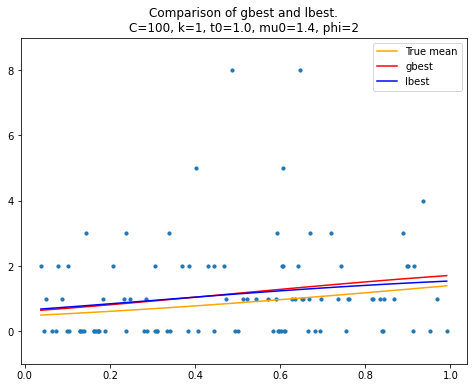

In [16]:
print("k_g, t_g, mu_g, phi:\n", [k, t0, mu0, phi])
print("gcost: ", np.round(gcost, 4))
print("gbest:\n", np.round(gbest, 4))
print("lcost: ", np.round(lcost, 4))
print("lbest:\n", np.round(lbest, 4))

plt.figure(figsize=(8, 6))


def plot_result(para, color, label):
    k_fit, t0_fit, mu0_fit, phi_fit = para
    mut_fit = link(np.sort(t), k_fit, t0_fit, mu0_fit)
    plt.plot(np.sort(t), mut_fit, c=color, label=label)


plt.scatter(t, y, s=10)
plt.plot(t, mut, c='orange', label="True mean")

plot_result(gbest, 'red', label="gbest")
plot_result(lbest + 0.01, 'blue', label="lbest")

plt.title("Comparison of gbest and lbest.\n" +
          "C=%d, k=%d, t0=%.1f, mu0=%.1f, phi=%d" % (len(t), k, t0, mu0, phi))
plt.legend()
plt.ylim(np.min(y) - 1, np.max(y) + 1)
plt.show()